In [1]:
import pandas as pd
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read PCAP file using Scapy
def readPCAP(pcapFile):
    packets = rdpcap(pcapFile)

    # packets[5].show()
    # Extract packet information
    packet_data = []
    for packet in packets:
        if 'IP' in packet:
            ip_layer = packet['IP']
            transport_layer = packet[ip_layer.payload.name]

            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
                'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
                'Timestamp': packet.time,
                'Packet Size': len(packet)
            }
            packet_data.append(packet_info)
            
    # Convert to Pandas DataFrame
    df = pd.DataFrame(packet_data)

    # Drop rows with NaN or None values
    df_cleaned = df.dropna()

    return df_cleaned

In [3]:
def plotIAT(df):
    # display(df['Interarrival'])

    # Plot the interarrival times
    plt.plot(df.index, df['Interarrival'], marker='o')
    plt.xlabel('Packet Number')
    plt.ylabel('Interarrival Time')
    plt.title('Interarrival Times of Packets')
    plt.grid(True)
    plt.show()

In [4]:
def plotTemporalPosition(df):
    # Visualize packets arrival over time
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Timestamp'], range(
        len(df)), label='Packets', color='blue')
    plt.xlabel('Timestamp')
    plt.ylabel('Packet Index')
    plt.title('Packets Arrival Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [5]:
rdpData = "data/pcap/rdp-data/capture1.pcapng"

df = readPCAP(rdpData)

# Sort the dataframe by 'Timestamp' column
df.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df['Interarrival'] = df['Timestamp'].diff().fillna(0)

df

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Interarrival
0,192.168.2.2,192.168.2.3,TCP,53590,3389,1715674148.874699827,74,0
1,192.168.2.3,192.168.2.2,TCP,3389,53590,1715674148.874729854,74,0.000030027
2,192.168.2.2,192.168.2.3,TCP,53590,3389,1715674148.875044808,66,0.000314954
3,192.168.2.2,192.168.2.3,TCP,53590,3389,1715674148.875298597,85,0.000253789
4,192.168.2.3,192.168.2.2,TCP,3389,53590,1715674148.875325806,66,0.000027209
...,...,...,...,...,...,...,...,...
590,192.168.2.3,192.168.2.2,TCP,3389,53590,1715674157.983735105,66,0.000043617
591,192.168.2.3,192.168.2.2,TCP,3389,53590,1715674157.984155742,90,0.000420637
592,192.168.2.3,192.168.2.2,TCP,3389,53590,1715674157.984234382,66,0.000078640
593,192.168.2.2,192.168.2.3,TCP,53590,3389,1715674157.9851728,60,0.000938418


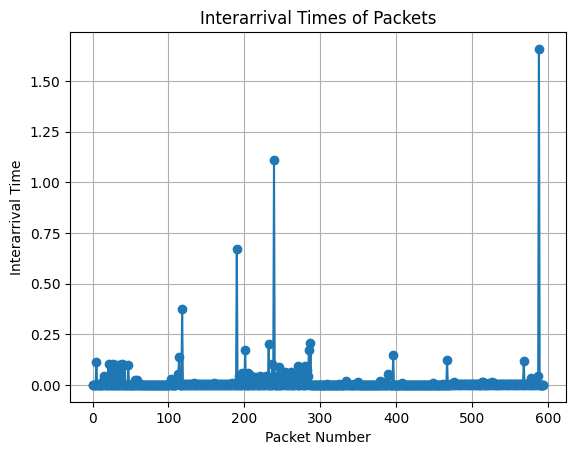

In [12]:
# 117 and 118
# 190 and 191

plotIAT(df)

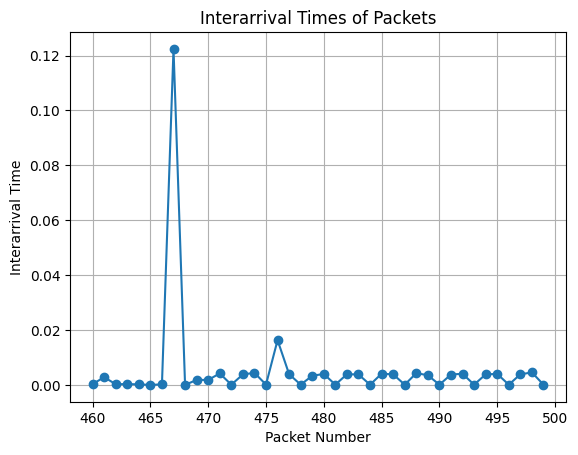

In [17]:
sliced_df = df.iloc[460: 500]

# 475 to 500 is regular

plotIAT(sliced_df)

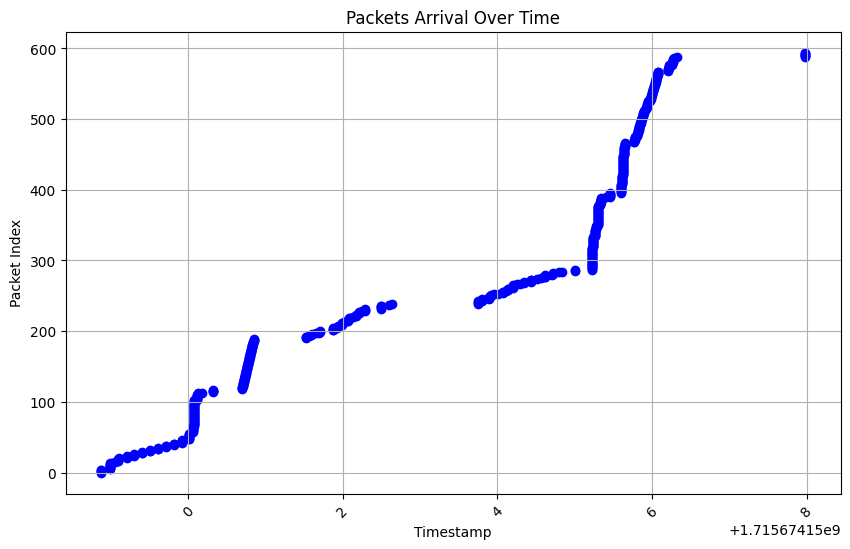

In [7]:
plotTemporalPosition(df)